In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd 
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
type1 = pd.read_csv('/content/drive/MyDrive/Хакатон Газпром /Вовины фичи 5/Ca_4_Mo_Zheq4_Vlo_Cu_train_5.csv')
type2 = pd.read_csv('/content/drive/MyDrive/Хакатон Газпром /Вовины фичи 5/Ca_4_Mo_Zhgt5_Vlo_Cu_train_5.csv')
type3 = pd.read_csv('/content/drive/MyDrive/Хакатон Газпром /Вовины фичи 5/Ca_4_Si_Zheq3_Vlo_Cu_train_5.csv')
type4 = pd.read_csv('/content/drive/MyDrive/Хакатон Газпром /Вовины фичи 5/Ca_4_Si_Zheq4_Vlo_Cu_train_5.csv')
type5 = pd.read_csv('/content/drive/MyDrive/Хакатон Газпром /Вовины фичи 5/Ca_4_Si_Zheq5_Vlo_Cu_train_5.csv')

In [ ]:
pip install lightautoml

In [ ]:

import time
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
roles = {
    'target': 'predict_0',
    'drop': ['posting_date','sintez_group', 'predict_1','predict_2','predict_3','predict_4','predict_5','predict_6','predict_7','predict_8','predict_9',
    'predict_10','predict_11']
}

In [ ]:
task = Task('multi:reg')

INFO2:lightautoml.tasks.losses.cb:CatBoost supports only MultiRMSE metric and loss for multi:reg task.


multi:reg isn`t supported in lgb


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def model(type):
  numeric = list(type.columns)
  numeric.remove('sintez_group')
  numeric.remove('posting_date')
  numeric.remove('season')
  #numeric.remove('april_or_march')
  numeric.remove('year')
  numeric.remove('day')
  numeric.remove('month')
  numeric.remove('day_of_week')
  numeric.remove('week')
  numeric.remove('predict_0')

  scaler = MinMaxScaler().fit(type[numeric])

  type[numeric] = scaler.transform(type[numeric])
  type[numeric] = scaler.transform(type[numeric])

  automl = TabularAutoML(task = task,
                       timeout = 600,
                       general_params = {'nested_cv': False, 'use_algos': [['linear_l2'],['cb']]},
                       reader_params = {'cv': 5, 'random_state': 42},
                       tuning_params = {'max_tuning_iter': 30, 'max_tuning_time': 40},
                       lgb_params = {'default_params': {'num_threads': 5}})
  
  

  for i in range(12):

      }
    oof_pred = automl.fit_predict(type[type['year'] < 2019], roles = roles)
    te_pred = automl.predict(type[type['year'] == 2019])
    target_true = type[type['year'] == 2019]
    error = mean_squared_error(target_true['predict_'+ str(i)].values, te_pred.data[:, 0], squared=False)
    print('Ошибка в '+str(i)+ ' месяце = '+ str(error))
  #return(error)

In [ ]:
model(type1)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: multi:reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (641, 36)



AssertionError: ignored

In [ ]:
numeric = list(type1.columns)
numeric.remove('sintez_group')
numeric.remove('posting_date')
numeric.remove('season')
#numeric.remove('april_or_march')
numeric.remove('year')
numeric.remove('day')
numeric.remove('month')
numeric.remove('day_of_week')
numeric.remove('week')
numeric.remove('predict_0')

In [ ]:
scaler = MinMaxScaler().fit(type1[numeric])

type1[numeric] = scaler.transform(type1[numeric])
type1[numeric] = scaler.transform(type1[numeric])

In [ ]:
automl = TabularAutoML(task = task,
                       timeout = 600,
                       general_params = {'nested_cv': False, 'use_algos': [['linear_l2'],['cb']]},
                       reader_params = {'cv': 5, 'random_state': 42},
                       tuning_params = {'max_tuning_iter': 30, 'max_tuning_time': 40},
                       lgb_params = {'default_params': {'num_threads': 5}})

In [ ]:
oof_pred = automl.fit_predict(type1[type1['year'] < 2019], roles = roles)

In [ ]:
te_pred = automl.predict(type1[type1['year'] == 2019])


#print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

In [ ]:
target_true = type1[type1['year'] == 2019]

In [ ]:
target_true['predict_0']

641      7.189
642     10.468
643     10.468
644     10.468
645     10.468
         ...  
1001    19.134
1002    18.974
1003    18.874
1004    18.874
1005    21.577
Name: predict_0, Length: 365, dtype: float64

In [ ]:
mean_squared_error(target_true['predict_0'].values, te_pred.data[:, 0], squared=False)
#scaler.inverse_transform(target_true['predict_0'].values.reshape(-1, 1)).reshape(-1)

11.767603647567656

In [ ]:

plt.plot(te_pred.data[:, 0], color='r', label='предикты')
plt.plot(target_true['predict_0'].values, color='g', label='валидация')
plt.legend()

NameError: ignored

CPU times: user 50.4 ms, sys: 0 ns, total: 50.4 ms
Wall time: 51.6 ms


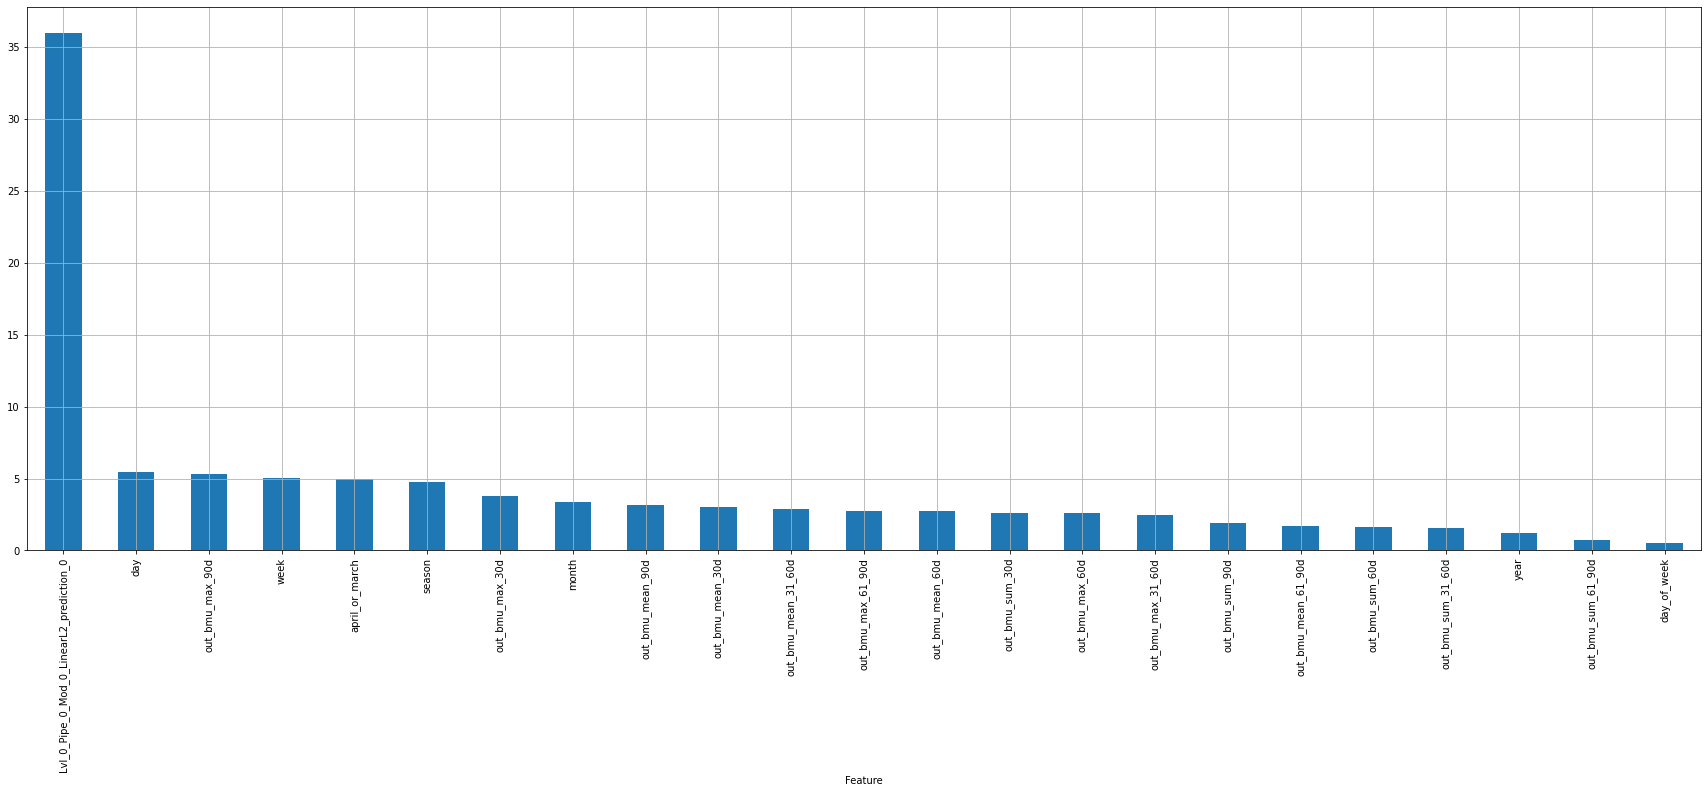

In [ ]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

CPU times: user 74.7 ms, sys: 8.9 ms, total: 83.6 ms
Wall time: 111 ms


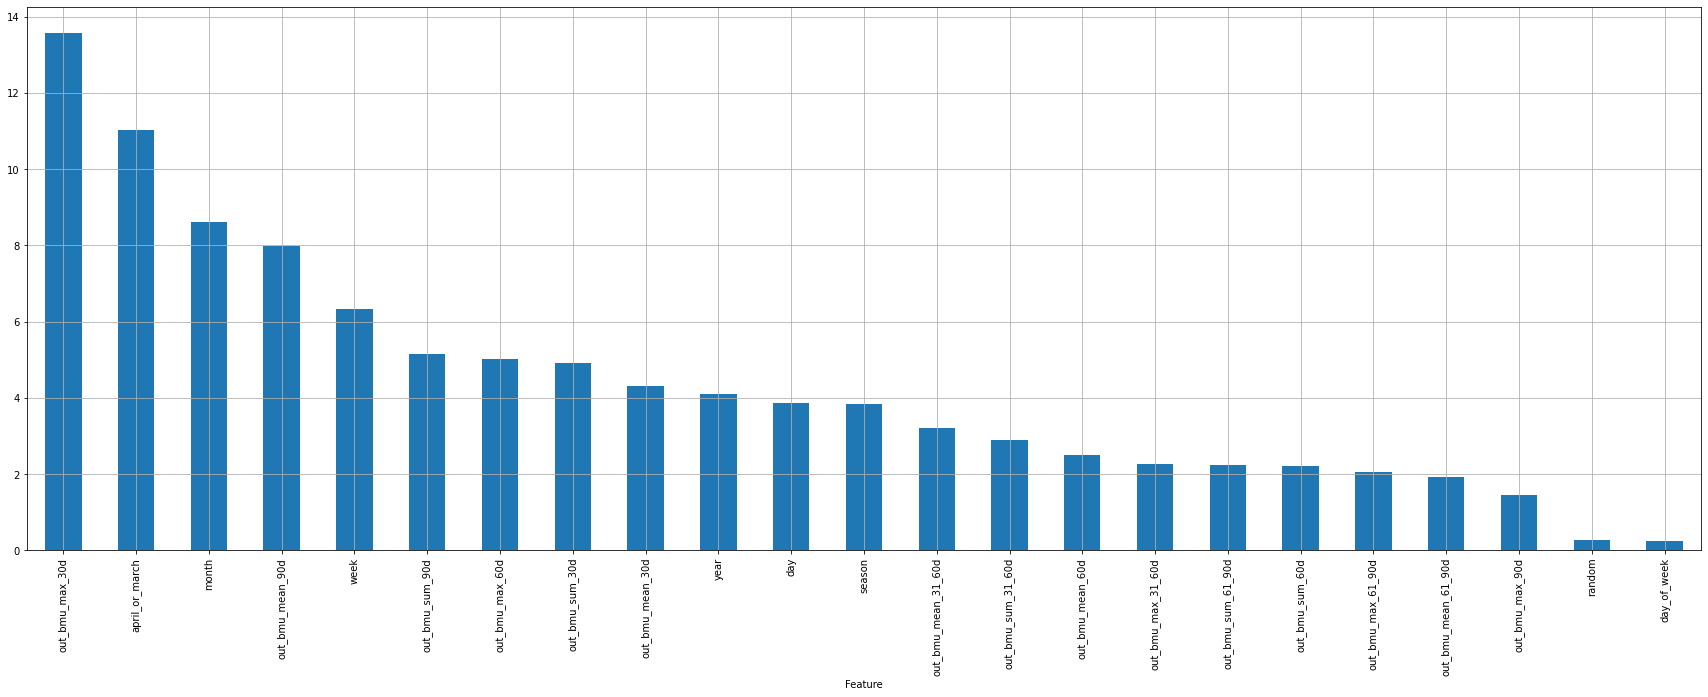

In [ ]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [ ]:
fast_fi

,Feature,Importance
0,out_bmu_fact_count_max_30d,23.582024
1,month,10.756373
2,out_bmu_max_30d,7.868280
3,out_bmu_mean_90d,6.951329
4,cu_price_min_30d,6.252749
5,season,4.485208
6,out_bmu_sum_60d,4.065604
7,out_bmu_max_60d,3.853845
8,out_bmu_max_90d,3.834892
9,out_bmu_mean_31_60d,3.593626


In [ ]:
X_val = type1[type1['year'] == 2019].drop(['posting_date','sintez_group','predict_0', 'predict_1','predict_2','predict_3','predict_4','predict_5','predict_6','predict_7','predict_8','predict_9',
    'predict_10','predict_11','april_or_march'], axis = 1 )

In [ ]:
X_val

,month,season,day,day_of_week,week,year,out_bmu_sum_30d,out_bmu_mean_30d,out_bmu_max_30d,out_bmu_sum_60d,...,out_bmu_max_60d,out_bmu_sum_90d,out_bmu_mean_90d,out_bmu_max_90d,out_bmu_sum_31_60d,out_bmu_mean_31_60d,out_bmu_max_31_60d,out_bmu_sum_61_90d,out_bmu_mean_61_90d,out_bmu_max_61_90d
641,1,1,1,1,1,2019,0.002527,0.075811,0.001233,-0.087290,...,-0.032547,-0.178008,-0.022810,-0.079004,0.003783,0.113491,0.001578,0.003783,0.113491,0.001578
642,1,1,2,2,1,2019,0.002527,0.075811,0.001233,-0.087290,...,-0.032547,-0.178008,-0.022810,-0.079004,0.003783,0.113491,0.001578,0.003783,0.113491,0.001578
643,1,1,3,3,1,2019,0.002527,0.075811,0.001233,-0.087290,...,-0.032547,-0.178142,-0.034870,-0.079004,0.003783,0.113491,0.001578,0.003783,0.113491,0.001578
644,1,1,4,4,1,2019,0.002451,0.073522,0.001233,-0.087290,...,-0.032547,-0.178142,-0.034870,-0.079004,0.003859,0.115781,0.001578,0.003859,0.115781,0.001578
645,1,1,5,5,1,2019,0.002395,0.071859,0.001233,-0.087290,...,-0.032547,-0.178142,-0.034870,-0.079004,0.003915,0.117444,0.001578,0.003915,0.117444,0.001578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,12,1,27,4,52,2019,0.003050,0.091492,0.000879,-0.087728,...,-0.033295,-0.178378,-0.056059,-0.079820,0.002199,0.065977,0.000677,0.002199,0.065977,0.000677
1002,12,1,28,5,52,2019,0.002978,0.089340,0.000879,-0.087756,...,-0.033295,-0.178375,-0.055829,-0.079820,0.002204,0.066105,0.000677,0.002204,0.066105,0.000677
1003,12,1,29,6,52,2019,0.002871,0.086133,0.000879,-0.087756,...,-0.033295,-0.178404,-0.058425,-0.079820,0.002310,0.069313,0.000677,0.002310,0.069313,0.000677
1004,12,1,30,0,1,2019,0.002042,0.061261,0.000511,-0.088018,...,-0.033295,-0.178398,-0.057888,-0.079820,0.002505,0.075144,0.000879,0.002505,0.075144,0.000879


In [ ]:
y_val

NameError: ignored

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(automl, X_val, target_true['predict_0'].values,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")


TypeError: ignored

In [ ]:
med = pd.read_csv('/content/drive/MyDrive/Хакатон Газпром /cu_norm (1).csv',sep = ';' )

In [ ]:
med

,Дата,Цена,Откр,Макс,Мин,Объём,Изм %
0,31.12.2020,7766.00,7828.50,7847.00,7733.50,22.88K,-0.0104
1,30.12.2020,7847.50,7826.25,7893.75,7807.00,21.22K,-0.0015
2,29.12.2020,7859.50,7886.50,7917.00,7817.50,27.89K,0.0092
3,24.12.2020,7787.50,7831.25,7868.75,7783.50,16.63K,-0.0071
4,23.12.2020,7843.50,7752.25,7853.25,7674.00,25.93K,0.0125
...,...,...,...,...,...,...,...
1007,09.01.2017,5587.75,5605.50,5618.25,5552.75,NaN,-0.0013
1008,06.01.2017,5595.00,5591.25,5614.75,5537.50,NaN,0.0023
1009,05.01.2017,5582.25,5648.50,5697.25,5575.50,NaN,-0.0091
1010,04.01.2017,5633.75,5495.50,5643.50,5453.75,NaN,0.0274


In [ ]:
type1

,sintez_group,posting_date,month,season,day,day_of_week,week,year,april_or_march,out_bmu_sum_30d,...,predict_2,predict_3,predict_4,predict_5,predict_6,predict_7,predict_8,predict_9,predict_10,predict_11
0,Ca_4_Mo_Zheq4_Vlo_Cu,2017-01-30,1,1,30,0,5,2017,0,0.000000,...,0.006323,0.009098,0.005875,0.005232,0.006938,0.006606,0.009589,-0.028355,-0.026646,-0.028482
1,Ca_4_Mo_Zheq4_Vlo_Cu,2017-01-31,1,1,31,1,5,2017,0,0.000012,...,0.008976,0.000118,0.006931,0.003959,0.006938,0.006938,0.009255,-0.028375,-0.026373,-0.028755
2,Ca_4_Mo_Zheq4_Vlo_Cu,2017-02-01,2,1,1,2,5,2017,0,0.000012,...,0.008976,0.002102,0.004909,0.000389,0.006938,0.006938,0.009255,-0.028375,-0.023099,-0.031783
3,Ca_4_Mo_Zheq4_Vlo_Cu,2017-02-02,2,1,2,3,5,2017,0,0.000012,...,0.008976,0.002102,0.004909,0.007328,0.000000,0.006992,0.009198,-0.028375,-0.023030,-0.031852
4,Ca_4_Mo_Zheq4_Vlo_Cu,2017-02-03,2,1,3,4,5,2017,0,0.000012,...,0.008976,0.002102,0.004909,0.007328,0.011973,0.009358,-0.006194,-0.026929,-0.024476,-0.031852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,Ca_4_Mo_Zheq4_Vlo_Cu,2019-12-27,12,1,27,4,52,2019,0,0.003050,...,0.001442,0.001176,0.005763,0.003884,0.002473,-0.001888,-0.001098,-0.035459,-0.035984,-0.032767
1062,Ca_4_Mo_Zheq4_Vlo_Cu,2019-12-28,12,1,28,5,52,2019,0,0.002978,...,0.001585,0.001028,0.005763,0.003884,0.002514,-0.001928,-0.001095,-0.035171,-0.036274,-0.032767
1063,Ca_4_Mo_Zheq4_Vlo_Cu,2019-12-29,12,1,29,6,52,2019,0,0.002871,...,0.001654,0.000957,0.006395,0.003683,0.002220,-0.001856,-0.001185,-0.035026,-0.036563,-0.031897
1064,Ca_4_Mo_Zheq4_Vlo_Cu,2019-12-30,12,1,30,0,1,2019,0,0.002042,...,0.001316,0.001333,0.005509,0.003628,0.002100,-0.001856,-0.001185,-0.035026,-0.036516,-0.031944


In [ ]:
tochnost = (1-(sum(np.abs(target_true['predict_0'].values - te_pred.data[:, 0])))/sum(target_true['predict_0'].values))*100

In [ ]:
print(1 - (np.abs(target_true['predict_0'].values - te_pred.data[:, 0])).sum() / target_true['predict_0'].values.sum())

0.6060942483135194


In [ ]:
tochnost

60.60942483135202

In [ ]:
pd.read_parquet()